# 튜토리얼 목차
1. 자연어 처리란? 
2. NLP Preprocessing 
3. Vectorization
## 4. Embedding <<
<br>

5. Modeling
***

## Embedding이란? 
- 앞에서 살펴보았던 vectorization의 치명적인 단점은 바로 단어나 문장들 사이의 관계에 대해서 설명하지 못한다는 것이다. 다음의 예시를 보자. 
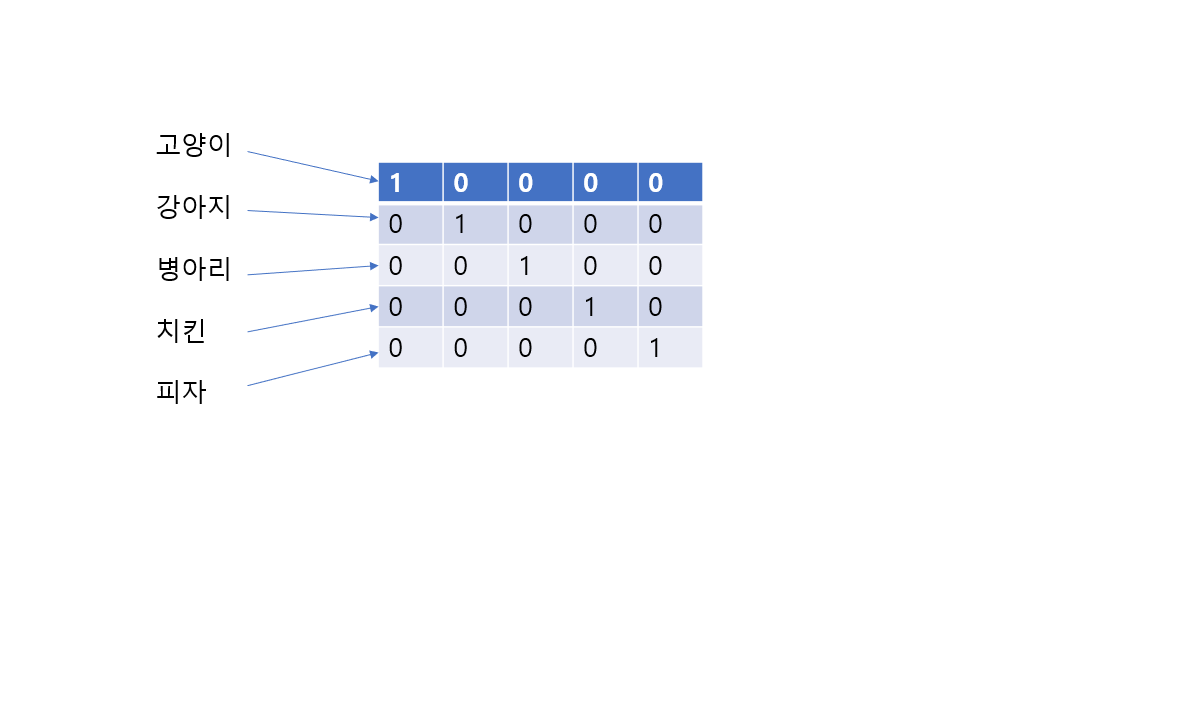
- one hot encoding을 통해 각 5개의 토큰들이 고유의 벡터를 갖게 되었다. 하지만 뭔가 이상하다고 느껴지지 않는가? 사람이 보기에는 5개의 토큰들이 너무나도 명확히 구분된다. 지금까지 살펴 본 벡터화 방법들은 단어의 중요도나 문서 안에서의 중요도는 구분할 수 있지만 단어 사이의 유사도는 구별할 수 없었다. 
- 이 때 사용되는 것이 Embedding 기법이며 word2vec을 비롯한 다양한 임베딩 기법들이 존재한다. 대략적인 아이디어는 다음과 같다. 

의미가 유사한 토큰들을 가깝게 임의의 차원에 뿌려보자!
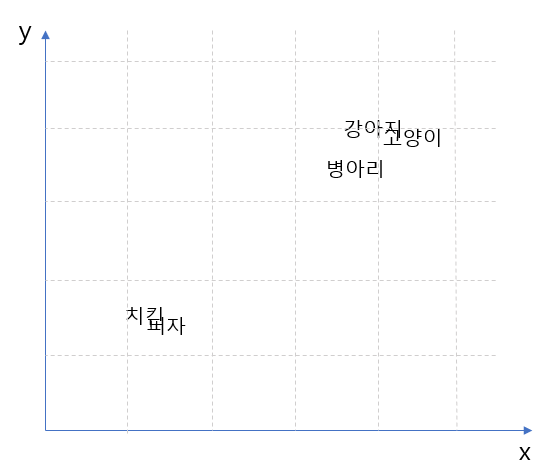
- 위의 예시처럼 비슷한 의미를 내포하고 있는 토큰들을 서로 가깝게, 그렇지 않은 토큰들은 서로 멀리 뿌리도록 하는 것이 임베딩의 목적이다. 검색 시스템, 감성 분석 등에서는 훌륭한 임베딩을 수행하는 것이 전체 문제 해결에 많은 영향을 준다. 
- 임베딩 또한 하나의 모델을 의미하며 훈련이 필요하다. 데이터가 충분하고 시간이 많으면 소지한 데이터에 특화된 임베딩 모델을 학습시킬 수 있다. 보통은 pre-trained embedding model을 가져와서 사용한다. 

## 1. Keras Embedding Layer
- 기본적으로 가장 쉽고 빠르게 네트워크 모델에 임베딩 층을 주입할 수 있는 방식이다. 이 방법은 무작위로 특정 차원으로 입력 벡터들을 뿌린 후 학습을 통해 가중치들을 조정해 나가는 방식이다. 즉, **단어 사이의 관계를 반영하는 방법이 아니다.**
- 적용은 아래와 같이 keras 코드로 매우 간단히 구현할 수 있다.

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding

model = Sequential()
model.add(Embedding(vocal_size, 128, input_length=max_len))

## 2. word2vec
- word2vec의 핵심 아이디어는 **"친구를 보면 그 사람을 알 수 있다"** 이다. 주변 단어와의 관계를 통해 해당 단어의 의미적 특성을 파악한다. 자세한 내용은 [다음 링크](https://dreamgonfly.github.io/blog/word2vec-explained/)를 참조.
- word2vec embedding matrix를 keras의 embedding에 주입하는 과정은 다음과 같다. <br>


1. 구글의 사전 훈련된 word2vec bin 파일을 [다운로드](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) 한다.
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRB6c5FLCKLBrhqCWAUMuw8wx_YCyoVal5Sgw&usqp=CAU" width="5%"><br>

2. gensim 모듈과 bin 파일을 활용해 word2vec 모델을 로드한다. 

In [ ]:
import gensim
word2vec = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRB6c5FLCKLBrhqCWAUMuw8wx_YCyoVal5Sgw&usqp=CAU" width="5%"><br>

3. vocabulary에 있는 토큰들의 벡터를 가져와 embedding matrix에 저장한다. 

In [ ]:
embedding_matrix = np.zeros((vocab_size, 300)) # 300차원의 임베딩 매트릭스 생성

for index, word in enumerate(vocabulary): # vocabulary에 있는 토큰들을 하나씩 넘겨준다
    if word in word2vec: # 넘겨받은 토큰이 word2vec에 존재하면(이미 훈련이 된 토큰이라는 뜻)
        embedding_vector = word2vec[word] # 해당 토큰에 해당하는 vector를 불러오고
        embedding_matrix[i] = embedding_vector # 해당 위치의 embedding_matrix에 저장한다. 
    else:
        print('word2vec에 없는 단어입니다.')
        break

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRB6c5FLCKLBrhqCWAUMuw8wx_YCyoVal5Sgw&usqp=CAU" width="5%"><br>

4. keras embedding layer에 embedding_matrix를 가중치로 주어 이용한다. 

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 300, weights = [embedding_matrix], input_length=max_len))

## 3. glove
- glove는 word2vec의 단점을 보완하기 위해 등장하였다. word2vec이 사용자가 지정한 주변 단어의 개수에 대해서만 학습이 이루어지기 때문에 데이터 전체에 대한 정보를 담기 어렵다는 단점을 지적하였다. glove의 핵심 아이디어는 다음과 같다. <br><br>


**각 토큰들 간의 유사성은 그대로 가져가면서 데이터 전체에 대한 빈도를 반영하자**<br><br>



- glove embedding matrix를 keras의 embedding matrix에 주입하는 방법은 다음과 같다. 


1. 사전 훈련된 벡터를 갖고 있는 txt 파일을 [이곳](https://drive.google.com/file/d/1yHGtccC2FV3_d6C6_Q4cozYSOgA7bG-e/view)에서 다운로드한다.
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRB6c5FLCKLBrhqCWAUMuw8wx_YCyoVal5Sgw&usqp=CAU" width="5%"><br>
2. txt 파일에 있는 단어와 벡터들을 glove dictionary에 저장한다.

In [ ]:
# load the whole embedding into memory
glove=dict()
f=open('./glove.txt')
for line in f:
    values=line.split()
    word=values[0]
    vector=asarray(values[1:], dtype='float32')
    glove[word]=vector
f.close()

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRB6c5FLCKLBrhqCWAUMuw8wx_YCyoVal5Sgw&usqp=CAU" width="5%"><br>
3. vocabulary에 있는 토큰들의 벡터를 가져와 embedding matrix에 저장한다.

In [ ]:
embedding_matrix = np.zeros((vocab_size, 300)) # 300차원의 임베딩 매트릭스 생성

for index, word in enumerate(vocabulary): # vocabulary에 있는 토큰들을 하나씩 넘겨준다
    if word in glove: # 넘겨 받은 토큰들이 word2vec에 존재하면(이미 훈련이 된 토큰이라는 뜻)
        embedding_vector = glove[word] # 해당 토큰에 해당하는 vector를 불러오고
        embedding_matrix[i] = embedding_vector # 해당 위치의 embedding_matrix에 저장한다
        
    else:
        print("glove에 없는 단어입니다.")
        break

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRB6c5FLCKLBrhqCWAUMuw8wx_YCyoVal5Sgw&usqp=CAU" width="5%"><br>
4. keras embedding layer에 embedding_matrix를 가중치로 주어 이용한다.

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_len))

## 4. Fasttext
- Fasttext의 핵심 아이디어는 단어 단위가 아닌 sub 단어를 단위로 사용한다. 즉 다음과 같다. <br>

word2vec -> "apple" 학습
FastText -> "ap", "pp", "pl", "le" 학습<br>

- 따라서 미리 학습되지 않은 단어들에 대한 vector도 표현해준다는 장점이 있다. 이용은 다음과 같다. <br>

1. 사전 훈련된 bin 파일을 [이곳](https://drive.google.com/file/d/1yHGtccC2FV3_d6C6_Q4cozYSOgA7bG-e/view)에서 다운로드한다.(glove에서 썼던 링크와 동일)

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRB6c5FLCKLBrhqCWAUMuw8wx_YCyoVal5Sgw&usqp=CAU" width="5%"><br>
2. vec 파일을 gensim을 활용하여 읽어온다.

In [ ]:
from gensim.models.keyevectors import KeyedVectors

FastText = KeyedVectors.load_word2vec_format('./fasttext.bin', binary=True)

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRB6c5FLCKLBrhqCWAUMuw8wx_YCyoVal5Sgw&usqp=CAU" width="5%"><br>
3. vocabulary에 있는 토큰들의 벡터를 가져와 embedding matrix에 저장한다.

In [ ]:
embedding_matrix = np.zeros((vocab_size, 300)) # 300차원의 임베딩 매트릭스 생성

for index, word in enumerate(vocabulary): # vocabulary에 있는 토큰들을 하나씩 넘겨준다
    if word in word2vec: # 넘겨받은 토큰이 word2vec에 존재하면(이미 훈련이 된 토큰이라는 뜻)
        embedding_vector = word2vec[word] # 해당 토큰에 해당하는 vector를 불러오고
        embedding_matrix[i] = embedding_vector # 해당 위치의 embedding_matrix에 저장한다

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRB6c5FLCKLBrhqCWAUMuw8wx_YCyoVal5Sgw&usqp=CAU" width="5%"><br>
4. keras embedding layer에 embedding_matrix를 가중치로 주어 이용한다.

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_len))

- 이렇게 wor embedding에 대해서 알아보았다. 이제 지금까지의 지식을 바탕으로 doc2vec이 무엇인지 유추할 수 있다. 즉, 단어 단위가 아닌 문장 단위의 벡터를 특정 차원에 뿌리는 것이다. doc2vec에 관해서는 이 문서에서 다루지 않으나 꼭 한 번 공부하는 것을 추천한다. <br>

- 대회에 대한 적용은 다음 모델링 문서에서 다룬다. 드디어 모델링이다!